In [ ]:
# 김동현 작성 이외 부분은 박정재 작성

import numpy as np
import matplotlib.pyplot as plt
import cv2

from copy import copy
import random

## Distance Function

## $d = \| f(z) - m \|^2 + \lambda * \| z - c \|^2$

where $z$ denotes the spatial index, $f(z)$ denotes the image value $\mathit(r,g,b)$ at the spatial location $z$, $m$ denotes the centroid of image intensity, $c$ denotes the centroid of spatial location, and $\lambda$ determines the importance between the image intensity and the spatial relation.

In [2]:
# 김동현 작성
# Euclidean-norm Distance Function
def distance(ci, i, cx, x, cy, y, lbd): # lbd = lambda
    
    d = (ci[0] - i[0]) ** 2 + (ci[1] - i[1]) ** 2 + (ci[2] - i[2]) ** 2 + lbd * ((cx - x) ** 2 + (cy - y) ** 2)
    
    return d

def img_normalize(data, height, width):
    
    normalized_data = np.empty((height, width, 3), dtype=np.float64)
    
    for y in range(height):
        for x in range(width):
            normalized_data[y][x] = data[y][x] / np.array([255,255,255])
            
    return normalized_data

def img_denormalize(data):
    
    denormed_img = np.empty((3), dtype=int)
    
    denormed_data = data * np.array([255,255,255])
    
    return denormed_data

# To check if values of centroids are same.
def centCheck(cx, cy, crgb, x, y, rgb):
    if cx == x and cy == y and (crgb ==rgb).all():
        return True
    return False

## Shape of the Image

$height\begin{bmatrix}
[r,g,b] & \cdots & [r,g,b] \\
\vdots & \ddots & \vdots \\
[r,g,b] & \cdots & [r,g,b]
\end{bmatrix} \\ \qquad \qquad \qquad width$

In [3]:
# read image using opencv library.
img = cv2.imread('images.jpg', cv2.IMREAD_COLOR)
height = img.shape[0]
width = img.shape[1]
b, g, r = cv2.split(img)
img2 = cv2.merge([r, g, b])

img2.shape

(168, 300, 3)

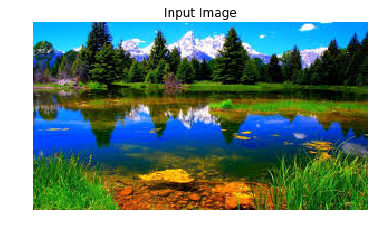

In [4]:
plt.imshow(img2)
plt.axis('off')
plt.title('Input Image')
plt.show()

In [5]:
# normalize image values.
img_normalized = np.empty((height, width, 3), dtype=np.float64)
img_normalized = img_normalize(img2, height, width)


### c1_rgb = [empty, empty, empty]
### c2_rgb = [empty,empty, empty]
### $\qquad \qquad \quad \vdots$
### c9_rgb = [empty, empty, empty]

# c1_x = random_x
# c1_y = random_y
# c1_rgb = img_normalized[c1_y][c1_x]

In [57]:
# Allocate centroids values.
c1_rgb = np.empty(3, dtype=np.float64)
c2_rgb = np.empty(3, dtype=np.float64)
c3_rgb = np.empty(3, dtype=np.float64)
c4_rgb = np.empty(3, dtype=np.float64)
c5_rgb = np.empty(3, dtype=np.float64)
c6_rgb = np.empty(3, dtype=np.float64)
c7_rgb = np.empty(3, dtype=np.float64)
c8_rgb = np.empty(3, dtype=np.float64)
c9_rgb = np.empty(3, dtype=np.float64)

c1_x = random.randint(0, width)
c1_y = random.randint(0, height)
c1_rgb = img_normalized[c1_y][c1_x]
print(c1_x, c1_y, img2[c1_y][c1_x])

c2_x = random.randint(0, width)
c2_y = random.randint(0, height)
c2_rgb = img_normalized[c2_y][c2_x]
print(c2_x, c2_y, img2[c2_y][c2_x])

c3_x = random.randint(0, width)
c3_y = random.randint(0, height)
c3_rgb = img_normalized[c3_y][c3_x]
print(c3_x, c3_y, img2[c3_y][c3_x])

c4_x = random.randint(0, width)
c4_y = random.randint(0, height)
c4_rgb = img_normalized[c4_y][c4_x]
print(c4_x, c4_y, img2[c4_y][c4_x])

c5_x = random.randint(0, width)
c5_y = random.randint(0, height)
c5_rgb = img_normalized[c5_y][c5_x]
print(c5_x, c5_y, img2[c5_y][c5_x])

c6_x = random.randint(0, width)
c6_y = random.randint(0, height)
c6_rgb = img_normalized[c6_y][c6_x]
print(c6_x, c6_y, img2[c6_y][c6_x])

c7_x = random.randint(0, width)
c7_y = random.randint(0, height)
c7_rgb = img_normalized[c7_y][c7_x]
print(c7_x, c7_y, img2[c7_y][c7_x])

c8_x = random.randint(0, width)
c8_y = random.randint(0, height)
c8_rgb = img_normalized[c8_y][c8_x]
print(c8_x, c8_y, img2[c8_y][c8_x])

c9_x = random.randint(0, width)
c9_y = random.randint(0, height)
c9_rgb = img_normalized[c9_y][c9_x]
print(c9_x, c9_y, img2[c9_y][c9_x])

242 137 [ 74 167  50]
90 73 [140 121  16]
32 128 [ 68 105  35]
211 37 [37 56 37]
170 118 [28 70 60]
275 99 [  9  56 198]
87 164 [158  65   8]
279 102 [ 0 35 65]
67 117 [  1  70 125]


In [7]:
# Save the location for later use.
c1_x_tmp = c1_x
c1_y_tmp = c1_y

c2_x_tmp = c2_x
c2_y_tmp = c2_y

c3_x_tmp = c3_x
c3_y_tmp = c3_y

c4_x_tmp = c4_x
c4_y_tmp = c4_y

c5_x_tmp = c5_x
c5_y_tmp = c5_y

c6_x_tmp = c6_x
c6_y_tmp = c6_y

c7_x_tmp = c7_x
c7_y_tmp = c7_y

c8_x_tmp = c8_x
c8_y_tmp = c8_y

c9_x_tmp = c9_x
c9_y_tmp = c9_y

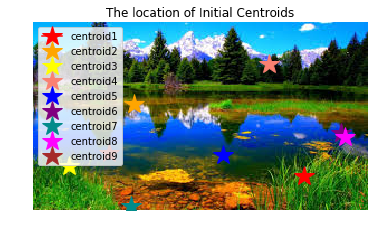

In [58]:
# show the location of initial centroids.
plt.imshow(img2)
plt.axis('off')
plt.title('The location of Initial Centroids')

plt.plot([c1_x], [c1_y], marker='*', color='red', label='centroid1', markersize=20)
plt.plot([c2_x], [c2_y], '*', color='orange', label='centroid2', markersize=20)
plt.plot([c3_x], [c3_y], '*', color='yellow', label='centroid3', markersize=20)
plt.plot([c4_x], [c4_y], '*', color='salmon', label='centroid4', markersize=20)
plt.plot([c5_x], [c5_y], '*', color='blue', label='centroid5', markersize=20)
plt.plot([c6_x], [c6_y], '*', color='purple', label='centroid6', markersize=20)
plt.plot([c7_x], [c7_y], '*', color='darkcyan', label='centroid7', markersize=20)
plt.plot([c8_x], [c8_y], '*', color='magenta', label='centroid8', markersize=20)
plt.plot([c9_x], [c9_y], '*', color='brown', label='centroid9', markersize=20)

plt.legend()
plt.show()

# Label Matrix
# $\begin{bmatrix}
0 & 0 & \cdots & 1 & 1 \\
0 & 0 &  & & 1 \\
\vdots &  &  & 3 & 3\\
8 & 8 & \cdots & 2 & 3
\end{bmatrix}$

In [9]:
# label each pixels.
labelMat = np.empty((height, width), dtype=int)

# to plot energy/cost/loss graph.
itCount = 0
energy = 0
x_num = []
y_energy = []

## 1. lambda = 0.1

In [10]:
# set lambda value.
lbd = 0.1

while True:
    itCount += 1
    
    # Initiate/reset cluster values.
    cluster1_x = np.zeros(0, dtype=np.float64)
    cluster1_y = np.zeros(0, dtype=np.float64)
    cluster1_rgb = np.zeros((0, 3), dtype=np.float64)

    cluster2_x = np.zeros(0, dtype=np.float64)
    cluster2_y = np.zeros(0, dtype=np.float64)
    cluster2_rgb = np.zeros((0,3), dtype=np.float64)

    cluster3_x = np.zeros(0, dtype=np.float64)
    cluster3_y = np.zeros(0, dtype=np.float64)
    cluster3_rgb = np.zeros((0,3), dtype=np.float64)
    
    cluster4_x = np.zeros(0, dtype=np.float64)
    cluster4_y = np.zeros(0, dtype=np.float64)
    cluster4_rgb = np.zeros((0,3), dtype=np.float64)
    
    cluster5_x = np.zeros(0, dtype=np.float64)
    cluster5_y = np.zeros(0, dtype=np.float64)
    cluster5_rgb = np.zeros((0,3), dtype=np.float64)
    
    cluster6_x = np.zeros(0, dtype=np.float64)
    cluster6_y = np.zeros(0, dtype=np.float64)
    cluster6_rgb = np.zeros((0, 3), dtype=np.float64)

    cluster7_x = np.zeros(0, dtype=np.float64)
    cluster7_y = np.zeros(0, dtype=np.float64)
    cluster7_rgb = np.zeros((0,3), dtype=np.float64)

    cluster8_x = np.zeros(0, dtype=np.float64)
    cluster8_y = np.zeros(0, dtype=np.float64)
    cluster8_rgb = np.zeros((0,3), dtype=np.float64)
    
    cluster9_x = np.zeros(0, dtype=np.float64)
    cluster9_y = np.zeros(0, dtype=np.float64)
    cluster9_rgb = np.zeros((0,3), dtype=np.float64)
    
    # 김동현 작성 (다른 lambda 값일 때도 동일)
    for y in range(height):
        for x in range(width):
            # compute distances from each centroids.
            d1 = distance(c1_rgb, img_normalized[y][x], c1_x, x, c1_y, y, lbd)
            d2 = distance(c2_rgb, img_normalized[y][x], c2_x, x, c2_y, y, lbd)
            d3 = distance(c3_rgb, img_normalized[y][x], c3_x, x, c3_y, y, lbd)
            d4 = distance(c4_rgb, img_normalized[y][x], c4_x, x, c4_y, y, lbd)
            d5 = distance(c5_rgb, img_normalized[y][x], c5_x, x, c5_y, y, lbd)
            d6 = distance(c6_rgb, img_normalized[y][x], c6_x, x, c6_y, y, lbd)
            d7 = distance(c7_rgb, img_normalized[y][x], c7_x, x, c7_y, y, lbd)
            d8 = distance(c8_rgb, img_normalized[y][x], c8_x, x, c8_y, y, lbd)
            d9 = distance(c9_rgb, img_normalized[y][x], c9_x, x, c9_y, y, lbd)
            
            d_list = np.array([d1, d2, d3, d4, d5, d6, d7, d8, d9])
            
            # allocate pixels to the minimum cluster.
            argMin = d_list.argmin()

            if argMin == 0:
                cluster1_x = np.append(cluster1_x, x)
                cluster1_y = np.append(cluster1_y, y)
                cluster1_rgb = np.append(cluster1_rgb, [img_normalized[y][x]], axis=0)
                
                labelMat[y][x] = 0
                
            elif argMin == 1:
                cluster2_x = np.append(cluster2_x, x)
                cluster2_y = np.append(cluster2_y, y)
                cluster2_rgb= np.append(cluster2_rgb, [img_normalized[y][x]], axis=0)
                
                labelMat[y][x] = 1
                
            elif argMin == 2:
                cluster3_x = np.append(cluster3_x, x)
                cluster3_y = np.append(cluster3_y, y)
                cluster3_rgb= np.append(cluster3_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 2
                
            elif argMin == 3:
                cluster4_x = np.append(cluster4_x, x)
                cluster4_y = np.append(cluster4_y, y)
                cluster4_rgb= np.append(cluster4_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 3
                
            elif argMin == 4:
                cluster5_x = np.append(cluster5_x, x)
                cluster5_y = np.append(cluster5_y, y)
                cluster5_rgb= np.append(cluster5_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 4
                
            elif argMin == 5:
                cluster6_x = np.append(cluster6_x, x)
                cluster6_y = np.append(cluster6_y, y)
                cluster6_rgb= np.append(cluster6_rgb, [img_normalized[y][x]], axis=0)
                
                labelMat[y][x] = 5
                
            elif argMin == 6:
                cluster7_x = np.append(cluster7_x, x)
                cluster7_y = np.append(cluster7_y, y)
                cluster7_rgb= np.append(cluster7_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 6
                
            elif argMin == 7:
                cluster8_x = np.append(cluster8_x, x)
                cluster8_y = np.append(cluster8_y, y)
                cluster8_rgb= np.append(cluster8_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 7
                
            elif argMin == 8:
                cluster9_x = np.append(cluster9_x, x)
                cluster9_y = np.append(cluster9_y, y)
                cluster9_rgb= np.append(cluster9_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 8
        
    # Re-define centroids & print.        
    print('Iteration Number:', itCount)
    
    new_c1_x = np.mean(cluster1_x)
    new_c1_y = np.mean(cluster1_y)
    new_c1_rgb = np.mean(cluster1_rgb, axis=0)
    print('c1', new_c1_x, new_c1_y, new_c1_rgb)
    
    new_c2_x = np.mean(cluster2_x)
    new_c2_y = np.mean(cluster2_y)
    new_c2_rgb = np.mean(cluster2_rgb, axis=0)
    print('c2', new_c2_x, new_c2_y, new_c2_rgb)
    
    new_c3_x = np.mean(cluster3_x)
    new_c3_y = np.mean(cluster3_y)
    new_c3_rgb = np.mean(cluster3_rgb, axis=0)
    print('c3', new_c3_x, new_c3_y, new_c3_rgb)
    
    new_c4_x = np.mean(cluster4_x)
    new_c4_y = np.mean(cluster4_y)
    new_c4_rgb = np.mean(cluster4_rgb, axis=0)
    print('c4', new_c4_x, new_c4_y, new_c4_rgb)
    
    new_c5_x = np.mean(cluster5_x)
    new_c5_y = np.mean(cluster5_y)
    new_c5_rgb = np.mean(cluster5_rgb, axis=0)
    print('c5', new_c5_x, new_c5_y, new_c5_rgb)
    
    new_c6_x = np.mean(cluster6_x)
    new_c6_y = np.mean(cluster6_y)
    new_c6_rgb = np.mean(cluster6_rgb, axis=0)
    print('c6', new_c6_x, new_c6_y, new_c6_rgb)
    
    new_c7_x = np.mean(cluster7_x)
    new_c7_y = np.mean(cluster7_y)
    new_c7_rgb = np.mean(cluster7_rgb, axis=0)
    print('c7', new_c7_x, new_c7_y, new_c7_rgb)
    
    new_c8_x = np.mean(cluster8_x)
    new_c8_y = np.mean(cluster8_y)
    new_c8_rgb = np.mean(cluster8_rgb, axis=0)
    print('c8', new_c8_x, new_c8_y, new_c8_rgb)
    
    new_c9_x = np.mean(cluster9_x)
    new_c9_y = np.mean(cluster9_y)
    new_c9_rgb = np.mean(cluster9_rgb, axis=0)
    print('c9', new_c9_x, new_c9_y, new_c9_rgb)

    # 김동현 작성 (다른 lambda 값일 때도 동일)
    # calculate energy
    for y in range(height):
        for x in range(width):
            if labelMat[y][x] == 0:
                energy += distance(new_c1_rgb, img_normalized[y][x], new_c1_x, x, new_c1_y, y, lbd)
            elif labelMat[y][x] == 1:
                energy += distance(new_c2_rgb, img_normalized[y][x], new_c2_x, x, new_c2_y, y, lbd)
            elif labelMat[y][x] == 2:
                energy += distance(new_c3_rgb, img_normalized[y][x], new_c3_x, x, new_c3_y, y, lbd)
            elif labelMat[y][x] == 3:
                energy += distance(new_c4_rgb, img_normalized[y][x], new_c4_x, x, new_c4_y, y, lbd)
            elif labelMat[y][x] == 4:
                energy += distance(new_c5_rgb, img_normalized[y][x], new_c5_x, x, new_c5_y, y, lbd)
            elif labelMat[y][x] == 5:
                energy += distance(new_c6_rgb, img_normalized[y][x], new_c6_x, x, new_c6_y, y, lbd)
            elif labelMat[y][x] == 6:
                energy += distance(new_c7_rgb, img_normalized[y][x], new_c7_x, x, new_c7_y, y, lbd)
            elif labelMat[y][x] == 7:
                energy += distance(new_c8_rgb, img_normalized[y][x], new_c8_x, x, new_c8_y, y, lbd)
            elif labelMat[y][x] == 8:
                energy += distance(new_c9_rgb, img_normalized[y][x], new_c9_x, x, new_c9_y, y, lbd)

    energy /= (height*width)
    
    x_num.append(itCount)
    y_energy.append(energy)
    
    # end the loop if centroids converge. continue clustering if not.
    if centCheck(new_c1_x, new_c1_y, new_c1_rgb, c1_x, c1_y, c1_rgb) and centCheck(new_c2_x, new_c2_y, new_c2_rgb, c2_x, c2_y, c2_rgb) and centCheck(new_c3_x, new_c3_y, new_c3_rgb, c3_x, c3_y, c3_rgb) and centCheck(new_c4_x, new_c4_y, new_c4_rgb, c4_x, c4_y, c4_rgb) and centCheck(new_c5_x, new_c5_y, new_c5_rgb, c5_x, c5_y, c5_rgb) and centCheck(new_c6_x, new_c6_y, new_c6_rgb, c6_x, c6_y, c6_rgb) and centCheck(new_c7_x, new_c7_y, new_c7_rgb, c7_x, c7_y, c7_rgb) and centCheck(new_c8_x, new_c8_y, new_c8_rgb, c8_x, c8_y, c8_rgb) and centCheck(new_c9_x, new_c9_y, new_c9_rgb, c9_x, c9_y, c9_rgb):
        break
    else:
        
        c1_x = new_c1_x
        c1_y = new_c1_y
        c1_rgb = copy(new_c1_rgb)
        
        c2_x = new_c2_x
        c2_y = new_c2_y
        c2_rgb = copy(new_c2_rgb)
        
        c3_x = new_c3_x
        c3_y = new_c3_y
        c3_rgb = copy(new_c3_rgb)
        
        c4_x = new_c4_x
        c4_y = new_c4_y
        c4_rgb = copy(new_c4_rgb)
        
        c5_x = new_c5_x
        c5_y = new_c5_y
        c5_rgb = copy(new_c5_rgb)
        
        c6_x = new_c6_x
        c6_y = new_c6_y
        c6_rgb = copy(new_c6_rgb)
        
        c7_x = new_c7_x
        c7_y = new_c7_y
        c7_rgb = copy(new_c7_rgb)
        
        c8_x = new_c8_x
        c8_y =new_c8_y
        c8_rgb = copy(new_c8_rgb)
        
        c9_x = new_c9_x
        c9_y = new_c9_y
        c9_rgb = copy(new_c9_rgb)
    
        energy = 0

Iteration Number: 1
c1 255.39059637695908 29.75697130063098 [0.1167842  0.36511616 0.44325299]
c2 76.52640923213494 125.94252108300044 [0.28569924 0.36925842 0.23762347]
c3 226.072864977801 122.97688691564377 [0.24673774 0.35755765 0.21879721]
c4 19.282038834951457 118.37718446601941 [0.11059585 0.3810356  0.4960099 ]
c5 274.94969905417025 99.09630266552021 [0.19396928 0.30182253 0.15640248]
c6 185.58229243203527 18.36627479794269 [0.18591145 0.56539597 0.68358185]
c7 142.1178125676358 71.45516196522617 [0.26723817 0.38068639 0.33153282]
c8 291.50114547537225 118.52462772050401 [0.20930306 0.34873436 0.11596703]
c9 32.1007866273353 43.21878072763028 [0.18927835 0.37789924 0.41351662]
Iteration Number: 2
c1 257.1544394281415 33.563769751693 [0.1187831  0.34056197 0.39037903]
c2 90.22226826909794 129.49716811714325 [0.32703466 0.35520939 0.24444715]
c3 210.5099260412612 127.88439081354613 [0.25274655 0.34251572 0.22670351]
c4 23.152794435116334 122.43151834972416 [0.12517038 0.41440229 0

Iteration Number: 13
c1 261.6422651933702 27.11901473296501 [0.11597786 0.3786029  0.48060701]
c2 107.92428066633013 127.69863705199394 [0.32656313 0.34173735 0.32192099]
c3 181.47550987634494 124.96322466677373 [0.27099003 0.30769105 0.26382893]
c4 35.44523539880278 124.19737906487623 [0.14805587 0.40491766 0.36607821]
c5 255.62102585841458 83.54302670623146 [0.19568694 0.30445021 0.27634425]
c6 184.44817642069552 39.517387616624255 [0.22203396 0.4268975  0.37017812]
c7 112.17395407360806 44.00896508335955 [0.30412203 0.44423206 0.38190022]
c8 260.17473778174514 140.0403927694711 [0.21962972 0.4131247  0.10280618]
c9 37.63153686230609 40.209659363505516 [0.19999812 0.3765032  0.36475543]
Iteration Number: 14
c1 261.55958668197474 27.136394948335248 [0.11590824 0.37861642 0.48046465]
c2 107.93198190651701 127.31077232367231 [0.32624442 0.3427112  0.32579898]
c3 181.31677917068467 125.0126968820315 [0.27197736 0.30775868 0.26382791]
c4 35.48076610939783 124.43093653627658 [0.1487249  0.

Iteration Number: 25
c1 260.8994350282486 27.127909604519775 [0.11581611 0.38075374 0.48294406]
c2 107.83877817706632 125.5655014701078 [0.32583354 0.34657904 0.33732601]
c3 181.07344357976655 125.66293774319067 [0.27255792 0.30581687 0.25979884]
c4 35.48289538919187 125.47892910262766 [0.15067158 0.40727412 0.36044536]
c5 255.7078154623973 83.8287339372235 [0.19596195 0.30497363 0.27891135]
c6 183.12367374005305 40.65334880636605 [0.22906525 0.42411453 0.36246619]
c7 110.30637056248987 41.70027557140541 [0.29368983 0.44580715 0.38438111]
c8 259.90791238265535 140.19848010728654 [0.21918536 0.41347656 0.10119383]
c9 36.51126851255634 41.473277527366385 [0.20013005 0.3724922  0.36093393]
Iteration Number: 26
c1 260.8692116557488 27.121752880054213 [0.11576999 0.38087316 0.48315019]
c2 107.8375244937949 125.55176355323319 [0.32587377 0.34661826 0.33734519]
c3 181.07426625587806 125.66985568347657 [0.27251436 0.30578443 0.25983333]
c4 35.5 125.5 [0.15067694 0.40733803 0.36034405]
c5 255.6

Iteration Number: 38
c1 260.66493916178456 27.064218116268588 [0.11572074 0.38162129 0.48457882]
c2 107.84148727984345 125.49706457925636 [0.32600757 0.34680493 0.33761623]
c3 181.10194805194806 125.75113636363636 [0.27217532 0.30544945 0.25993952]
c4 35.5 125.5 [0.15067694 0.40733803 0.36034405]
c5 255.7118501368133 83.74047568932856 [0.19593563 0.3050982  0.27842394]
c6 182.81551952349437 40.88749172733289 [0.2305628  0.42375391 0.36053386]
c7 110.15813498532768 41.516628627323115 [0.29307492 0.44594002 0.38474079]
c8 259.9481911567664 140.14537740062528 [0.21915071 0.41335855 0.10161749]
c9 36.494127111826224 41.49332260659694 [0.20010096 0.3724468  0.36103229]
Iteration Number: 39
c1 260.6587784539103 27.057245886860493 [0.11568406 0.38161361 0.48466505]
c2 107.84148727984345 125.49706457925636 [0.32600757 0.34680493 0.33761623]
c3 181.10194805194806 125.75113636363636 [0.27217532 0.30544945 0.25993952]
c4 35.5 125.5 [0.15067694 0.40733803 0.36034405]
c5 255.71837507893076 83.72910

In [11]:
c1_rgb_denorm = np.empty((3), dtype=int)
c2_rgb_denorm = np.empty((3), dtype=int)
c3_rgb_denorm = np.empty((3), dtype=int)
c4_rgb_denorm = np.empty((3), dtype=int)
c5_rgb_denorm = np.empty((3), dtype=int)
c6_rgb_denorm = np.empty((3), dtype=int)
c7_rgb_denorm = np.empty((3), dtype=int)
c8_rgb_denorm = np.empty((3), dtype=int)
c9_rgb_denorm = np.empty((3), dtype=int)

# denormalize image values.
c1_rgb_denorm = img_denormalize(new_c1_rgb)
c2_rgb_denorm = img_denormalize(new_c2_rgb)
c3_rgb_denorm = img_denormalize(new_c3_rgb)
c4_rgb_denorm = img_denormalize(new_c4_rgb)
c5_rgb_denorm = img_denormalize(new_c5_rgb)
c6_rgb_denorm = img_denormalize(new_c6_rgb)
c7_rgb_denorm = img_denormalize(new_c7_rgb)
c8_rgb_denorm = img_denormalize(new_c8_rgb)
c9_rgb_denorm = img_denormalize(new_c9_rgb)

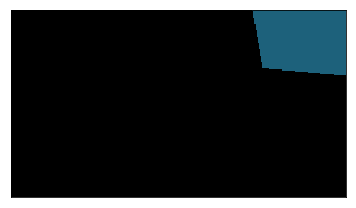

In [12]:
# plot each clusters.
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 0:
            new_image[y][x] = c1_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                       
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

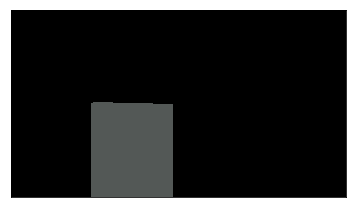

In [13]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 1:
            new_image[y][x] = c2_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                     
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

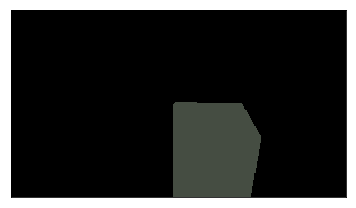

In [14]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 2:
            new_image[y][x] = c3_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                       
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

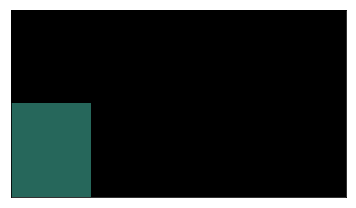

In [15]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 3:
            new_image[y][x] = c4_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                        
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

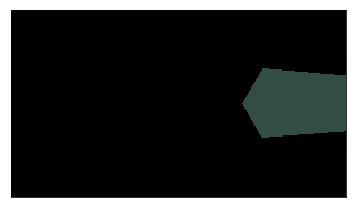

In [16]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 4:
            new_image[y][x] = c5_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                        
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

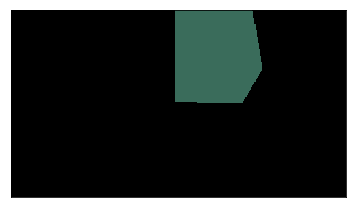

In [17]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 5:
            new_image[y][x] = c6_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                        
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

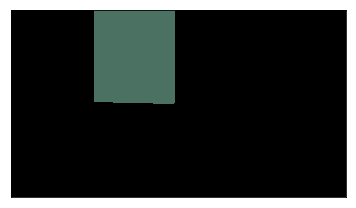

In [18]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 6:
            new_image[y][x] = c7_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                        
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

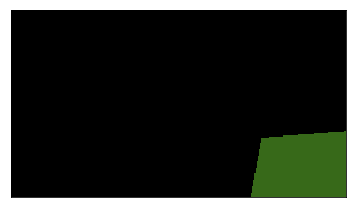

In [19]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 7:
            new_image[y][x] = c8_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                        
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

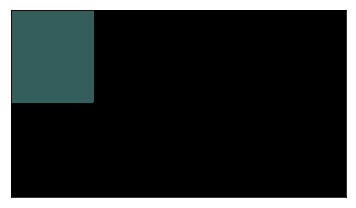

In [20]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 8:
            new_image[y][x] = c9_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                        
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

In [21]:
new_image = np.empty((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 0:
            new_image[y][x] = c1_rgb_denorm
        elif labelMat[y][x] == 1:
            new_image[y][x] = c2_rgb_denorm
        elif labelMat[y][x] == 2:
            new_image[y][x] = c3_rgb_denorm
        elif labelMat[y][x] == 3:
            new_image[y][x] = c4_rgb_denorm
        elif labelMat[y][x] == 4:
            new_image[y][x] = c5_rgb_denorm
        elif labelMat[y][x] == 5:
            new_image[y][x] = c6_rgb_denorm
        elif labelMat[y][x] == 6:
            new_image[y][x] = c7_rgb_denorm
        elif labelMat[y][x] == 7:
            new_image[y][x] = c8_rgb_denorm
        elif labelMat[y][x] == 8:
            new_image[y][x] = c9_rgb_denorm

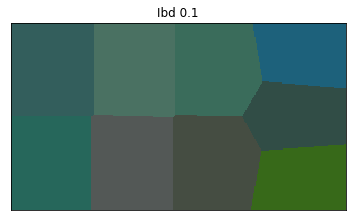

In [22]:
# plot whole image
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.title('Ibd {}'.format(lbd))
plt.show()

The energy/cost function is given by:

## ${1 \over n} \sum_k \sum_{z \in I(k)}  \| f(z) - m_k \|^2 + \lambda * \| z - c_k \|^2$

where $I(k)$ denotes the index set of $z$ that belongs to cluster $k$, $f(z)$ denotes the image value $\mathit(r,g,b)$ at the spatial location $z$, $m_k$ denotes the centroid of image intensity for cluster $k$, $c_k$ denotes the centroid of spatial location for cluster $k$, $n$ denotes total number of pixels, and $\lambda$ determines the importance between the image intensity and the spatial relation.

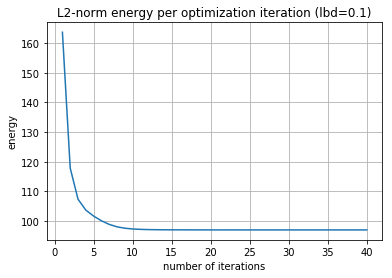

In [23]:
# 김동현 작성 (다른 lambda 값일 때도 동일)
# plot energy curve.
fig, ax = plt.subplots()
ax.plot(x_num, y_energy)
ax.set(xlabel='number of iterations', ylabel='energy',
title='L2-norm energy per optimization iteration (lbd={})'.format(lbd))
ax.grid()
plt.show()

## 2. lambda = 0.0001

In [24]:
# try with new lambda value.

c1_x = c1_x_tmp
c1_y = c1_y_tmp
c1_rgb = img_normalized[c1_y][c1_x]
print(c1_x, c1_y, img2[c1_y][c1_x])

c2_x = c2_x_tmp
c2_y = c2_y_tmp
c2_rgb = img_normalized[c2_y][c2_x]
print(c2_x, c2_y, img2[c2_y][c2_x])

c3_x = c3_x_tmp
c3_y = c3_y_tmp
c3_rgb = img_normalized[c3_y][c3_x]
print(c3_x, c3_y, img2[c3_y][c3_x])

c4_x = c4_x_tmp
c4_y = c4_y_tmp
c4_rgb = img_normalized[c4_y][c4_x]
print(c4_x, c4_y, img2[c4_y][c4_x])

c5_x = c5_x_tmp
c5_y = c5_y_tmp
c5_rgb = img_normalized[c5_y][c5_x]
print(c5_x, c5_y, img2[c5_y][c5_x])

c6_x = c6_x_tmp
c6_y = c6_y_tmp
c6_rgb = img_normalized[c6_y][c6_x]
print(c6_x, c6_y, img2[c6_y][c6_x])

c7_x = c7_x_tmp
c7_y = c7_y_tmp
c7_rgb = img_normalized[c7_y][c7_x]
print(c7_x, c7_y, img2[c7_y][c7_x])

c8_x = c8_x_tmp
c8_y = c8_y_tmp
c8_rgb = img_normalized[c8_y][c8_x]
print(c8_x, c8_y, img2[c8_y][c8_x])

c9_x = c9_x_tmp
c9_y = c9_y_tmp
c9_rgb = img_normalized[c9_y][c9_x]
print(c9_x, c9_y, img2[c9_y][c9_x])

242 16 [ 16 191 254]
49 128 [57 75 49]
253 108 [154 139  36]
15 110 [  1  66 244]
274 106 [ 18  63 131]
195 9 [  8 187 254]
162 60 [ 74 113   7]
296 109 [  4  34 107]
4 93 [  0 105 249]


In [25]:
itCount = 0
energy = 0
x_num = []
y_energy = []

In [26]:
lbd = 0.0001

while True:
    itCount += 1
    
    # Initiate/reset cluster values.
    cluster1_x = np.zeros(0, dtype=np.float64)
    cluster1_y = np.zeros(0, dtype=np.float64)
    cluster1_rgb = np.zeros((0, 3), dtype=np.float64)

    cluster2_x = np.zeros(0, dtype=np.float64)
    cluster2_y = np.zeros(0, dtype=np.float64)
    cluster2_rgb = np.zeros((0,3), dtype=np.float64)

    cluster3_x = np.zeros(0, dtype=np.float64)
    cluster3_y = np.zeros(0, dtype=np.float64)
    cluster3_rgb = np.zeros((0,3), dtype=np.float64)
    
    cluster4_x = np.zeros(0, dtype=np.float64)
    cluster4_y = np.zeros(0, dtype=np.float64)
    cluster4_rgb = np.zeros((0,3), dtype=np.float64)
    
    cluster5_x = np.zeros(0, dtype=np.float64)
    cluster5_y = np.zeros(0, dtype=np.float64)
    cluster5_rgb = np.zeros((0,3), dtype=np.float64)
    
    cluster6_x = np.zeros(0, dtype=np.float64)
    cluster6_y = np.zeros(0, dtype=np.float64)
    cluster6_rgb = np.zeros((0, 3), dtype=np.float64)

    cluster7_x = np.zeros(0, dtype=np.float64)
    cluster7_y = np.zeros(0, dtype=np.float64)
    cluster7_rgb = np.zeros((0,3), dtype=np.float64)

    cluster8_x = np.zeros(0, dtype=np.float64)
    cluster8_y = np.zeros(0, dtype=np.float64)
    cluster8_rgb = np.zeros((0,3), dtype=np.float64)
    
    cluster9_x = np.zeros(0, dtype=np.float64)
    cluster9_y = np.zeros(0, dtype=np.float64)
    cluster9_rgb = np.zeros((0,3), dtype=np.float64)
    
    for y in range(height):
        for x in range(width):
            d1 = distance(c1_rgb, img_normalized[y][x], c1_x, x, c1_y, y, lbd)
            d2 = distance(c2_rgb, img_normalized[y][x], c2_x, x, c2_y, y, lbd)
            d3 = distance(c3_rgb, img_normalized[y][x], c3_x, x, c3_y, y, lbd)
            d4 = distance(c4_rgb, img_normalized[y][x], c4_x, x, c4_y, y, lbd)
            d5 = distance(c5_rgb, img_normalized[y][x], c5_x, x, c5_y, y, lbd)
            d6 = distance(c6_rgb, img_normalized[y][x], c6_x, x, c6_y, y, lbd)
            d7 = distance(c7_rgb, img_normalized[y][x], c7_x, x, c7_y, y, lbd)
            d8 = distance(c8_rgb, img_normalized[y][x], c8_x, x, c8_y, y, lbd)
            d9 = distance(c9_rgb, img_normalized[y][x], c9_x, x, c9_y, y, lbd)
            
            d_list = np.array([d1, d2, d3, d4, d5, d6, d7, d8, d9])
            
            argMin = d_list.argmin()

            if argMin == 0:
                cluster1_x = np.append(cluster1_x, x)
                cluster1_y = np.append(cluster1_y, y)
                cluster1_rgb = np.append(cluster1_rgb, [img_normalized[y][x]], axis=0)
                
                labelMat[y][x] = 0
                
            elif argMin == 1:
                cluster2_x = np.append(cluster2_x, x)
                cluster2_y = np.append(cluster2_y, y)
                cluster2_rgb= np.append(cluster2_rgb, [img_normalized[y][x]], axis=0)
                
                labelMat[y][x] = 1
                
            elif argMin == 2:
                cluster3_x = np.append(cluster3_x, x)
                cluster3_y = np.append(cluster3_y, y)
                cluster3_rgb= np.append(cluster3_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 2
                
            elif argMin == 3:
                cluster4_x = np.append(cluster4_x, x)
                cluster4_y = np.append(cluster4_y, y)
                cluster4_rgb= np.append(cluster4_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 3
                
            elif argMin == 4:
                cluster5_x = np.append(cluster5_x, x)
                cluster5_y = np.append(cluster5_y, y)
                cluster5_rgb= np.append(cluster5_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 4
                
            elif argMin == 5:
                cluster6_x = np.append(cluster6_x, x)
                cluster6_y = np.append(cluster6_y, y)
                cluster6_rgb= np.append(cluster6_rgb, [img_normalized[y][x]], axis=0)
                
                labelMat[y][x] = 5
                
            elif argMin == 6:
                cluster7_x = np.append(cluster7_x, x)
                cluster7_y = np.append(cluster7_y, y)
                cluster7_rgb= np.append(cluster7_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 6
                
            elif argMin == 7:
                cluster8_x = np.append(cluster8_x, x)
                cluster8_y = np.append(cluster8_y, y)
                cluster8_rgb= np.append(cluster8_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 7
                
            elif argMin == 8:
                cluster9_x = np.append(cluster9_x, x)
                cluster9_y = np.append(cluster9_y, y)
                cluster9_rgb= np.append(cluster9_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 8
        
            
    print('Iteration Number:', itCount)
    
    new_c1_x = np.mean(cluster1_x)
    new_c1_y = np.mean(cluster1_y)
    new_c1_rgb = np.mean(cluster1_rgb, axis=0)
    print('c1', new_c1_x, new_c1_y, new_c1_rgb)
    
    new_c2_x = np.mean(cluster2_x)
    new_c2_y = np.mean(cluster2_y)
    new_c2_rgb = np.mean(cluster2_rgb, axis=0)
    print('c2', new_c2_x, new_c2_y, new_c2_rgb)
    
    new_c3_x = np.mean(cluster3_x)
    new_c3_y = np.mean(cluster3_y)
    new_c3_rgb = np.mean(cluster3_rgb, axis=0)
    print('c3', new_c3_x, new_c3_y, new_c3_rgb)
    
    new_c4_x = np.mean(cluster4_x)
    new_c4_y = np.mean(cluster4_y)
    new_c4_rgb = np.mean(cluster4_rgb, axis=0)
    print('c4', new_c4_x, new_c4_y, new_c4_rgb)
    
    new_c5_x = np.mean(cluster5_x)
    new_c5_y = np.mean(cluster5_y)
    new_c5_rgb = np.mean(cluster5_rgb, axis=0)
    print('c5', new_c5_x, new_c5_y, new_c5_rgb)
    
    new_c6_x = np.mean(cluster6_x)
    new_c6_y = np.mean(cluster6_y)
    new_c6_rgb = np.mean(cluster6_rgb, axis=0)
    print('c6', new_c6_x, new_c6_y, new_c6_rgb)
    
    new_c7_x = np.mean(cluster7_x)
    new_c7_y = np.mean(cluster7_y)
    new_c7_rgb = np.mean(cluster7_rgb, axis=0)
    print('c7', new_c7_x, new_c7_y, new_c7_rgb)
    
    new_c8_x = np.mean(cluster8_x)
    new_c8_y = np.mean(cluster8_y)
    new_c8_rgb = np.mean(cluster8_rgb, axis=0)
    print('c8', new_c8_x, new_c8_y, new_c8_rgb)
    
    new_c9_x = np.mean(cluster9_x)
    new_c9_y = np.mean(cluster9_y)
    new_c9_rgb = np.mean(cluster9_rgb, axis=0)
    print('c9', new_c9_x, new_c9_y, new_c9_rgb)

    
    # energy
    for y in range(height):
        for x in range(width):
            if labelMat[y][x] == 0:
                energy += distance(new_c1_rgb, img_normalized[y][x], new_c1_x, x, new_c1_y, y, lbd)
            elif labelMat[y][x] == 1:
                energy += distance(new_c2_rgb, img_normalized[y][x], new_c2_x, x, new_c2_y, y, lbd)
            elif labelMat[y][x] == 2:
                energy += distance(new_c3_rgb, img_normalized[y][x], new_c3_x, x, new_c3_y, y, lbd)
            elif labelMat[y][x] == 3:
                energy += distance(new_c4_rgb, img_normalized[y][x], new_c4_x, x, new_c4_y, y, lbd)
            elif labelMat[y][x] == 4:
                energy += distance(new_c5_rgb, img_normalized[y][x], new_c5_x, x, new_c5_y, y, lbd)
            elif labelMat[y][x] == 5:
                energy += distance(new_c6_rgb, img_normalized[y][x], new_c6_x, x, new_c6_y, y, lbd)
            elif labelMat[y][x] == 6:
                energy += distance(new_c7_rgb, img_normalized[y][x], new_c7_x, x, new_c7_y, y, lbd)
            elif labelMat[y][x] == 7:
                energy += distance(new_c8_rgb, img_normalized[y][x], new_c8_x, x, new_c8_y, y, lbd)
            elif labelMat[y][x] == 8:
                energy += distance(new_c9_rgb, img_normalized[y][x], new_c9_x, x, new_c9_y, y, lbd)

    energy /= (height*width)
    
    x_num.append(itCount)
    y_energy.append(energy)
    
    if centCheck(new_c1_x, new_c1_y, new_c1_rgb, c1_x, c1_y, c1_rgb) and centCheck(new_c2_x, new_c2_y, new_c2_rgb, c2_x, c2_y, c2_rgb) and centCheck(new_c3_x, new_c3_y, new_c3_rgb, c3_x, c3_y, c3_rgb) and centCheck(new_c4_x, new_c4_y, new_c4_rgb, c4_x, c4_y, c4_rgb) and centCheck(new_c5_x, new_c5_y, new_c5_rgb, c5_x, c5_y, c5_rgb) and centCheck(new_c6_x, new_c6_y, new_c6_rgb, c6_x, c6_y, c6_rgb) and centCheck(new_c7_x, new_c7_y, new_c7_rgb, c7_x, c7_y, c7_rgb) and centCheck(new_c8_x, new_c8_y, new_c8_rgb, c8_x, c8_y, c8_rgb) and centCheck(new_c9_x, new_c9_y, new_c9_rgb, c9_x, c9_y, c9_rgb):
        break
    else:
        
        c1_x = new_c1_x
        c1_y = new_c1_y
        c1_rgb = copy(new_c1_rgb)
        
        c2_x = new_c2_x
        c2_y = new_c2_y
        c2_rgb = copy(new_c2_rgb)
        
        c3_x = new_c3_x
        c3_y = new_c3_y
        c3_rgb = copy(new_c3_rgb)
        
        c4_x = new_c4_x
        c4_y = new_c4_y
        c4_rgb = copy(new_c4_rgb)
        
        c5_x = new_c5_x
        c5_y = new_c5_y
        c5_rgb = copy(new_c5_rgb)
        
        c6_x = new_c6_x
        c6_y = new_c6_y
        c6_rgb = copy(new_c6_rgb)
        
        c7_x = new_c7_x
        c7_y = new_c7_y
        c7_rgb = copy(new_c7_rgb)
        
        c8_x = new_c8_x
        c8_y =new_c8_y
        c8_rgb = copy(new_c8_rgb)
        
        c9_x = new_c9_x
        c9_y = new_c9_y
        c9_rgb = copy(new_c9_rgb)
    
    
        energy = 0

Iteration Number: 1
c1 252.98683613254653 15.425783023150249 [0.17945048 0.67728677 0.94520307]
c2 61.230304494925086 107.91807636539392 [0.26855132 0.3390808  0.14451963]
c3 236.4230506155951 127.48803009575923 [0.39123146 0.44177865 0.08101781]
c4 55.558013765978366 102.2566371681416 [0.04306206 0.32878131 0.91416122]
c5 243.25837422658418 94.11990612331982 [0.07618067 0.23720763 0.37370282]
c6 152.11304780876495 20.54382470119522 [0.30443325 0.73409011 0.96306246]
c7 154.59545659696104 75.19159019106364 [0.23159114 0.29021761 0.15943976]
c8 285.44345746498124 84.07413734198839 [0.08482486 0.18149748 0.05489928]
c9 26.881760161236144 37.57339603627813 [0.14655891 0.56240721 0.82401681]
Iteration Number: 2
c1 244.77304701962237 14.29285449833395 [0.16468991 0.68923928 0.95241414]
c2 61.4362822538178 108.23091100579252 [0.28000392 0.34740851 0.10886122]
c3 232.17990689292688 138.9562997447064 [0.33842095 0.41269872 0.07401983]
c4 59.064308681672024 100.31218941829874 [0.05821254 0.3548

Iteration Number: 13
c1 232.30684523809524 13.649107142857142 [0.17030112 0.70375467 0.96040733]
c2 74.47490615876546 143.38523564576673 [0.35225914 0.40073874 0.09883465]
c3 234.32853878209437 140.53945422771878 [0.29161257 0.37570884 0.09363002]
c4 57.68133498145859 101.41211372064276 [0.06134128 0.34803073 0.81785307]
c5 205.4311193111931 99.56857318573186 [0.06961146 0.30290621 0.72137448]
c6 95.24729947138589 19.17260399908067 [0.34038513 0.7590448  0.94536663]
c7 152.9849183597158 69.35797083385268 [0.22415115 0.283484   0.10328492]
c8 258.9134987113402 59.49130154639175 [0.14867912 0.20950766 0.06628891]
c9 49.75402052381682 52.456118854342165 [0.22904868 0.27029753 0.14093081]
Iteration Number: 14
c1 231.66303066037736 13.590801886792454 [0.17061598 0.70414817 0.96030915]
c2 74.96731116984282 143.63277229100015 [0.35433328 0.40110245 0.09867526]
c3 234.35697971248152 140.48528819024588 [0.29071664 0.37547847 0.09391164]
c4 57.43933054393305 101.27836573960128 [0.06262928 0.3483

Iteration Number: 25
c1 230.7063099738296 13.555975574294854 [0.17265735 0.70482413 0.95962689]
c2 76.53402854006586 143.62678375411636 [0.35615462 0.3999209  0.09843256]
c3 233.7052575677111 140.24097185342538 [0.28811711 0.37387148 0.09445295]
c4 55.52730883813307 101.32050645481628 [0.06427459 0.34826898 0.81089433]
c5 199.31216931216932 99.37125220458553 [0.07746193 0.31189496 0.72784291]
c6 92.55383168782322 18.478608368594266 [0.33749366 0.7577763  0.94482609]
c7 154.3824377457405 66.7786369593709 [0.22273379 0.28235551 0.09782695]
c8 259.8181525068515 60.06754796066419 [0.1477533  0.20873391 0.07251773]
c9 51.07412439613527 53.11382850241546 [0.22856931 0.26964336 0.13213093]
Iteration Number: 26
c1 230.7063099738296 13.555975574294854 [0.17265735 0.70482413 0.95962689]
c2 76.56029633694608 143.62546302647826 [0.35615418 0.39988917 0.09843035]
c3 233.67334483216135 140.22913626111185 [0.28796083 0.37375353 0.09452505]
c4 55.406661695252296 101.33159333830474 [0.06438274 0.348282

Iteration Number: 37
c1 230.7125 13.576744186046511 [0.17283972 0.70482558 0.95957478]
c2 76.6078377637709 143.59852014250478 [0.35595463 0.39977055 0.09860773]
c3 233.6291390728477 140.18688741721854 [0.28758914 0.37352811 0.09481834]
c4 55.21825891743577 101.3419805437765 [0.06407348 0.34815684 0.81095574]
c5 198.4815249266862 99.30439882697947 [0.07871658 0.31330918 0.72937611]
c6 92.51786553831688 18.473201692524682 [0.33739779 0.75768688 0.94474128]
c7 154.36790220820188 66.57702418506835 [0.22260984 0.28206996 0.09697274]
c8 259.8501287830006 60.14455891822279 [0.14762256 0.20880838 0.07340947]
c9 51.03218008762653 53.1309865538601 [0.22855475 0.26960888 0.13214424]
Iteration Number: 38
c1 230.7125 13.576744186046511 [0.17283972 0.70482558 0.95957478]
c2 76.6078377637709 143.59852014250478 [0.35595463 0.39977055 0.09860773]
c3 233.62932061978546 140.183022116276 [0.28755106 0.37350721 0.09485719]
c4 55.21825891743577 101.3419805437765 [0.06407348 0.34815684 0.81095574]
c5 198.457

In [27]:
c1_rgb_denorm = img_denormalize(new_c1_rgb)
c2_rgb_denorm = img_denormalize(new_c2_rgb)
c3_rgb_denorm = img_denormalize(new_c3_rgb)
c4_rgb_denorm = img_denormalize(new_c4_rgb)
c5_rgb_denorm = img_denormalize(new_c5_rgb)
c6_rgb_denorm = img_denormalize(new_c6_rgb)
c7_rgb_denorm = img_denormalize(new_c7_rgb)
c8_rgb_denorm = img_denormalize(new_c8_rgb)
c9_rgb_denorm = img_denormalize(new_c9_rgb)

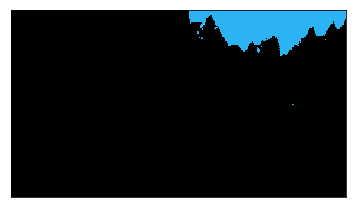

In [28]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 0:
            new_image[y][x] = c1_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                       
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

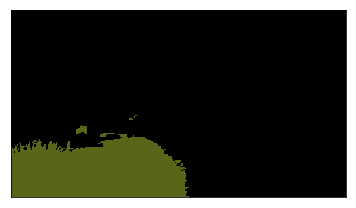

In [29]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 1:
            new_image[y][x] = c2_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                     
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

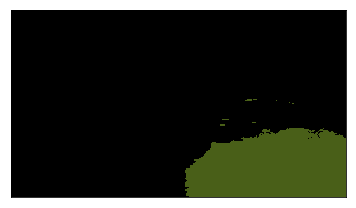

In [30]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 2:
            new_image[y][x] = c3_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                     
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

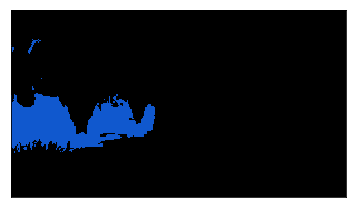

In [31]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 3:
            new_image[y][x] = c4_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                     
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

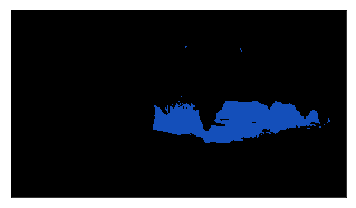

In [32]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 4:
            new_image[y][x] = c5_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                     
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

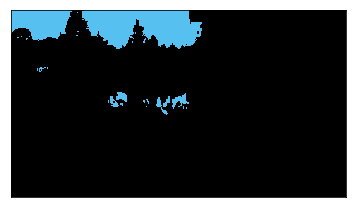

In [33]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 5:
            new_image[y][x] = c6_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                     
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

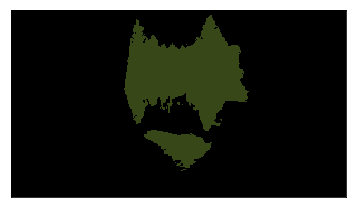

In [34]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 6:
            new_image[y][x] = c7_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                     
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

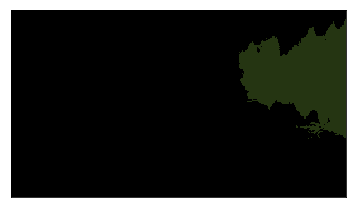

In [35]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 7:
            new_image[y][x] = c8_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                     
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

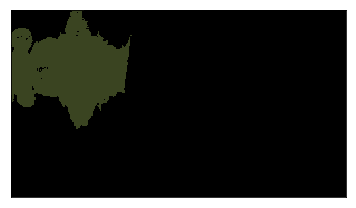

In [36]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 8:
            new_image[y][x] = c9_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                     
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

In [37]:
new_image = np.empty((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 0:
            new_image[y][x] = c1_rgb_denorm
        elif labelMat[y][x] == 1:
            new_image[y][x] = c2_rgb_denorm
        elif labelMat[y][x] == 2:
            new_image[y][x] = c3_rgb_denorm
        elif labelMat[y][x] == 3:
            new_image[y][x] = c4_rgb_denorm
        elif labelMat[y][x] == 4:
            new_image[y][x] = c5_rgb_denorm
        elif labelMat[y][x] == 5:
            new_image[y][x] = c6_rgb_denorm
        elif labelMat[y][x] == 6:
            new_image[y][x] = c7_rgb_denorm
        elif labelMat[y][x] == 7:
            new_image[y][x] = c8_rgb_denorm
        elif labelMat[y][x] == 8:
            new_image[y][x] = c9_rgb_denorm

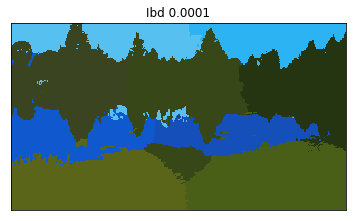

In [38]:
# Whole Image
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.title('Ibd {}'.format(lbd))
plt.show()

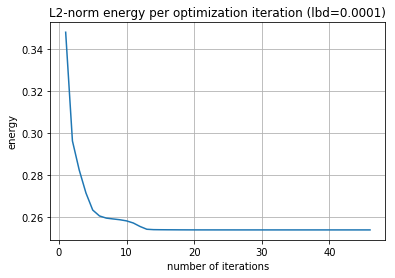

In [39]:
fig, ax = plt.subplots()
ax.plot(x_num, y_energy)
ax.set(xlabel='number of iterations', ylabel='energy',
title='L2-norm energy per optimization iteration (lbd={})'.format(lbd)) # format형으로 바꾸자
ax.grid()
plt.show()

## 3. lambda = 0.000001

In [40]:
# new lambda

c1_x = c1_x_tmp
c1_y = c1_y_tmp
c1_rgb = img_normalized[c1_y][c1_x]
print(c1_x, c1_y, img2[c1_y][c1_x])

c2_x = c2_x_tmp
c2_y = c2_y_tmp
c2_rgb = img_normalized[c2_y][c2_x]
print(c2_x, c2_y, img2[c2_y][c2_x])

c3_x = c3_x_tmp
c3_y = c3_y_tmp
c3_rgb = img_normalized[c3_y][c3_x]
print(c3_x, c3_y, img2[c3_y][c3_x])

c4_x = c4_x_tmp
c4_y = c4_y_tmp
c4_rgb = img_normalized[c4_y][c4_x]
print(c4_x, c4_y, img2[c4_y][c4_x])

c5_x = c5_x_tmp
c5_y = c5_y_tmp
c5_rgb = img_normalized[c5_y][c5_x]
print(c5_x, c5_y, img2[c5_y][c5_x])

c6_x = c6_x_tmp
c6_y = c6_y_tmp
c6_rgb = img_normalized[c6_y][c6_x]
print(c6_x, c6_y, img2[c6_y][c6_x])

c7_x = c7_x_tmp
c7_y = c7_y_tmp
c7_rgb = img_normalized[c7_y][c7_x]
print(c7_x, c7_y, img2[c7_y][c7_x])

c8_x = c8_x_tmp
c8_y = c8_y_tmp
c8_rgb = img_normalized[c8_y][c8_x]
print(c8_x, c8_y, img2[c8_y][c8_x])

c9_x = c9_x_tmp
c9_y = c9_y_tmp
c9_rgb = img_normalized[c9_y][c9_x]
print(c9_x, c9_y, img2[c9_y][c9_x])

242 16 [ 16 191 254]
49 128 [57 75 49]
253 108 [154 139  36]
15 110 [  1  66 244]
274 106 [ 18  63 131]
195 9 [  8 187 254]
162 60 [ 74 113   7]
296 109 [  4  34 107]
4 93 [  0 105 249]


In [41]:
itCount = 0
energy = 0
x_num = []
y_energy = []

In [42]:
lbd = 0.000001

while True:
    itCount += 1
    
    # Initiate/reset cluster values.
    cluster1_x = np.zeros(0, dtype=np.float64)
    cluster1_y = np.zeros(0, dtype=np.float64)
    cluster1_rgb = np.zeros((0, 3), dtype=np.float64)

    cluster2_x = np.zeros(0, dtype=np.float64)
    cluster2_y = np.zeros(0, dtype=np.float64)
    cluster2_rgb = np.zeros((0,3), dtype=np.float64)

    cluster3_x = np.zeros(0, dtype=np.float64)
    cluster3_y = np.zeros(0, dtype=np.float64)
    cluster3_rgb = np.zeros((0,3), dtype=np.float64)
    
    cluster4_x = np.zeros(0, dtype=np.float64)
    cluster4_y = np.zeros(0, dtype=np.float64)
    cluster4_rgb = np.zeros((0,3), dtype=np.float64)
    
    cluster5_x = np.zeros(0, dtype=np.float64)
    cluster5_y = np.zeros(0, dtype=np.float64)
    cluster5_rgb = np.zeros((0,3), dtype=np.float64)
    
    cluster6_x = np.zeros(0, dtype=np.float64)
    cluster6_y = np.zeros(0, dtype=np.float64)
    cluster6_rgb = np.zeros((0, 3), dtype=np.float64)

    cluster7_x = np.zeros(0, dtype=np.float64)
    cluster7_y = np.zeros(0, dtype=np.float64)
    cluster7_rgb = np.zeros((0,3), dtype=np.float64)

    cluster8_x = np.zeros(0, dtype=np.float64)
    cluster8_y = np.zeros(0, dtype=np.float64)
    cluster8_rgb = np.zeros((0,3), dtype=np.float64)
    
    cluster9_x = np.zeros(0, dtype=np.float64)
    cluster9_y = np.zeros(0, dtype=np.float64)
    cluster9_rgb = np.zeros((0,3), dtype=np.float64)
    
    for y in range(height):
        for x in range(width):
            d1 = distance(c1_rgb, img_normalized[y][x], c1_x, x, c1_y, y, lbd)
            d2 = distance(c2_rgb, img_normalized[y][x], c2_x, x, c2_y, y, lbd)
            d3 = distance(c3_rgb, img_normalized[y][x], c3_x, x, c3_y, y, lbd)
            d4 = distance(c4_rgb, img_normalized[y][x], c4_x, x, c4_y, y, lbd)
            d5 = distance(c5_rgb, img_normalized[y][x], c5_x, x, c5_y, y, lbd)
            d6 = distance(c6_rgb, img_normalized[y][x], c6_x, x, c6_y, y, lbd)
            d7 = distance(c7_rgb, img_normalized[y][x], c7_x, x, c7_y, y, lbd)
            d8 = distance(c8_rgb, img_normalized[y][x], c8_x, x, c8_y, y, lbd)
            d9 = distance(c9_rgb, img_normalized[y][x], c9_x, x, c9_y, y, lbd)
            
            d_list = np.array([d1, d2, d3, d4, d5, d6, d7, d8, d9])
            
            argMin = d_list.argmin()

            if argMin == 0:
                cluster1_x = np.append(cluster1_x, x)
                cluster1_y = np.append(cluster1_y, y)
                cluster1_rgb = np.append(cluster1_rgb, [img_normalized[y][x]], axis=0)
                
                labelMat[y][x] = 0
                
            elif argMin == 1:
                cluster2_x = np.append(cluster2_x, x)
                cluster2_y = np.append(cluster2_y, y)
                cluster2_rgb= np.append(cluster2_rgb, [img_normalized[y][x]], axis=0)
                
                labelMat[y][x] = 1
                
            elif argMin == 2:
                cluster3_x = np.append(cluster3_x, x)
                cluster3_y = np.append(cluster3_y, y)
                cluster3_rgb= np.append(cluster3_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 2
                
            elif argMin == 3:
                cluster4_x = np.append(cluster4_x, x)
                cluster4_y = np.append(cluster4_y, y)
                cluster4_rgb= np.append(cluster4_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 3
                
            elif argMin == 4:
                cluster5_x = np.append(cluster5_x, x)
                cluster5_y = np.append(cluster5_y, y)
                cluster5_rgb= np.append(cluster5_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 4
                
            elif argMin == 5:
                cluster6_x = np.append(cluster6_x, x)
                cluster6_y = np.append(cluster6_y, y)
                cluster6_rgb= np.append(cluster6_rgb, [img_normalized[y][x]], axis=0)
                
                labelMat[y][x] = 5
                
            elif argMin == 6:
                cluster7_x = np.append(cluster7_x, x)
                cluster7_y = np.append(cluster7_y, y)
                cluster7_rgb= np.append(cluster7_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 6
                
            elif argMin == 7:
                cluster8_x = np.append(cluster8_x, x)
                cluster8_y = np.append(cluster8_y, y)
                cluster8_rgb= np.append(cluster8_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 7
                
            elif argMin == 8:
                cluster9_x = np.append(cluster9_x, x)
                cluster9_y = np.append(cluster9_y, y)
                cluster9_rgb= np.append(cluster9_rgb, [img_normalized[y][x]], axis=0)

                labelMat[y][x] = 8
        
            
    print('Iteration Number:', itCount)
    
    new_c1_x = np.mean(cluster1_x)
    new_c1_y = np.mean(cluster1_y)
    new_c1_rgb = np.mean(cluster1_rgb, axis=0)
    print('c1', new_c1_x, new_c1_y, new_c1_rgb)
    
    new_c2_x = np.mean(cluster2_x)
    new_c2_y = np.mean(cluster2_y)
    new_c2_rgb = np.mean(cluster2_rgb, axis=0)
    print('c2', new_c2_x, new_c2_y, new_c2_rgb)
    
    new_c3_x = np.mean(cluster3_x)
    new_c3_y = np.mean(cluster3_y)
    new_c3_rgb = np.mean(cluster3_rgb, axis=0)
    print('c3', new_c3_x, new_c3_y, new_c3_rgb)
    
    new_c4_x = np.mean(cluster4_x)
    new_c4_y = np.mean(cluster4_y)
    new_c4_rgb = np.mean(cluster4_rgb, axis=0)
    print('c4', new_c4_x, new_c4_y, new_c4_rgb)
    
    new_c5_x = np.mean(cluster5_x)
    new_c5_y = np.mean(cluster5_y)
    new_c5_rgb = np.mean(cluster5_rgb, axis=0)
    print('c5', new_c5_x, new_c5_y, new_c5_rgb)
    
    new_c6_x = np.mean(cluster6_x)
    new_c6_y = np.mean(cluster6_y)
    new_c6_rgb = np.mean(cluster6_rgb, axis=0)
    print('c6', new_c6_x, new_c6_y, new_c6_rgb)
    
    new_c7_x = np.mean(cluster7_x)
    new_c7_y = np.mean(cluster7_y)
    new_c7_rgb = np.mean(cluster7_rgb, axis=0)
    print('c7', new_c7_x, new_c7_y, new_c7_rgb)
    
    new_c8_x = np.mean(cluster8_x)
    new_c8_y = np.mean(cluster8_y)
    new_c8_rgb = np.mean(cluster8_rgb, axis=0)
    print('c8', new_c8_x, new_c8_y, new_c8_rgb)
    
    new_c9_x = np.mean(cluster9_x)
    new_c9_y = np.mean(cluster9_y)
    new_c9_rgb = np.mean(cluster9_rgb, axis=0)
    print('c9', new_c9_x, new_c9_y, new_c9_rgb)

    
    # energy
    for y in range(height):
        for x in range(width):
            if labelMat[y][x] == 0:
                energy += distance(new_c1_rgb, img_normalized[y][x], new_c1_x, x, new_c1_y, y, lbd)
            elif labelMat[y][x] == 1:
                energy += distance(new_c2_rgb, img_normalized[y][x], new_c2_x, x, new_c2_y, y, lbd)
            elif labelMat[y][x] == 2:
                energy += distance(new_c3_rgb, img_normalized[y][x], new_c3_x, x, new_c3_y, y, lbd)
            elif labelMat[y][x] == 3:
                energy += distance(new_c4_rgb, img_normalized[y][x], new_c4_x, x, new_c4_y, y, lbd)
            elif labelMat[y][x] == 4:
                energy += distance(new_c5_rgb, img_normalized[y][x], new_c5_x, x, new_c5_y, y, lbd)
            elif labelMat[y][x] == 5:
                energy += distance(new_c6_rgb, img_normalized[y][x], new_c6_x, x, new_c6_y, y, lbd)
            elif labelMat[y][x] == 6:
                energy += distance(new_c7_rgb, img_normalized[y][x], new_c7_x, x, new_c7_y, y, lbd)
            elif labelMat[y][x] == 7:
                energy += distance(new_c8_rgb, img_normalized[y][x], new_c8_x, x, new_c8_y, y, lbd)
            elif labelMat[y][x] == 8:
                energy += distance(new_c9_rgb, img_normalized[y][x], new_c9_x, x, new_c9_y, y, lbd)

    energy /= (height*width)
    
    x_num.append(itCount)
    y_energy.append(energy)
    
    if centCheck(new_c1_x, new_c1_y, new_c1_rgb, c1_x, c1_y, c1_rgb) and centCheck(new_c2_x, new_c2_y, new_c2_rgb, c2_x, c2_y, c2_rgb) and centCheck(new_c3_x, new_c3_y, new_c3_rgb, c3_x, c3_y, c3_rgb) and centCheck(new_c4_x, new_c4_y, new_c4_rgb, c4_x, c4_y, c4_rgb) and centCheck(new_c5_x, new_c5_y, new_c5_rgb, c5_x, c5_y, c5_rgb) and centCheck(new_c6_x, new_c6_y, new_c6_rgb, c6_x, c6_y, c6_rgb) and centCheck(new_c7_x, new_c7_y, new_c7_rgb, c7_x, c7_y, c7_rgb) and centCheck(new_c8_x, new_c8_y, new_c8_rgb, c8_x, c8_y, c8_rgb) and centCheck(new_c9_x, new_c9_y, new_c9_rgb, c9_x, c9_y, c9_rgb):
        break
    else:
        
        c1_x = new_c1_x
        c1_y = new_c1_y
        c1_rgb = copy(new_c1_rgb)
        
        c2_x = new_c2_x
        c2_y = new_c2_y
        c2_rgb = copy(new_c2_rgb)
        
        c3_x = new_c3_x
        c3_y = new_c3_y
        c3_rgb = copy(new_c3_rgb)
        
        c4_x = new_c4_x
        c4_y = new_c4_y
        c4_rgb = copy(new_c4_rgb)
        
        c5_x = new_c5_x
        c5_y = new_c5_y
        c5_rgb = copy(new_c5_rgb)
        
        c6_x = new_c6_x
        c6_y = new_c6_y
        c6_rgb = copy(new_c6_rgb)
        
        c7_x = new_c7_x
        c7_y = new_c7_y
        c7_rgb = copy(new_c7_rgb)
        
        c8_x = new_c8_x
        c8_y = new_c8_y
        c8_rgb = copy(new_c8_rgb)
        
        c9_x = new_c9_x
        c9_y = new_c9_y
        c9_rgb = copy(new_c9_rgb)
    
    
        energy = 0

Iteration Number: 1
c1 185.03459030337396 27.8077686419053 [0.46430061 0.77477054 0.95496145]
c2 126.63883408642525 79.08718895182334 [0.14105867 0.21147869 0.10117088]
c3 150.66684434968016 120.55650319829424 [0.65488942 0.49618504 0.16707569]
c4 106.52119797744068 98.9124854142357 [0.01852945 0.28668482 0.89977349]
c5 158.41128048780487 96.68841463414634 [0.08305237 0.28667982 0.56134146]
c6 127.79146666666666 8.153333333333334 [0.0507681  0.72138039 0.98637386]
c7 170.42107591576712 109.32657936648381 [0.27674644 0.41712347 0.05448663]
c8 242.75175471001108 70.52013298854821 [0.02133322 0.1079163  0.1381922 ]
c9 98.05046826222684 83.56347554630594 [0.11026504 0.43711412 0.94727714]
Iteration Number: 2
c1 149.72444444444446 38.03757575757576 [0.71932026 0.77923866 0.89890275]
c2 125.31162268388546 82.97641774284111 [0.14284807 0.22494082 0.08854393]
c3 139.32342007434943 123.30947955390334 [0.64964283 0.46926379 0.13101902]
c4 111.55308219178082 99.24486301369863 [0.01349181 0.292965

Iteration Number: 13
c1 153.49255583126552 33.19602977667494 [0.83783876 0.85721549 0.92965261]
c2 133.02030362298595 96.33473037161218 [0.20146972 0.29322281 0.08125869]
c3 143.1804890345349 136.3531635996975 [0.70305906 0.44476144 0.07999723]
c4 116.33590138674884 94.13713405238829 [0.04137458 0.33161986 0.90441921]
c5 139.3305142857143 98.26902857142858 [0.07109109 0.26546913 0.45298017]
c6 150.32984104046244 13.703576589595375 [0.07562762 0.72476765 0.98522966]
c7 152.90477304632662 108.68238184370612 [0.34504069 0.47992192 0.09724875]
c8 189.92316622691294 65.61572559366755 [0.05232304 0.12060386 0.04262404]
c9 133.33602986932172 59.395146235220906 [0.48663079 0.53350171 0.68062521]
Iteration Number: 14
c1 153.38056930693068 33.20730198019802 [0.83696612 0.85689672 0.92988983]
c2 132.8083325583558 96.4498279549893 [0.20316774 0.29434193 0.08143209]
c3 143.25503184713375 136.82700636942675 [0.70465742 0.44428425 0.07875009]
c4 116.3577699736611 94.06848112379281 [0.04205099 0.33193

Iteration Number: 25
c1 152.99832120872972 33.898153329602685 [0.81465047 0.83775415 0.92427883]
c2 131.65972867496748 96.41451403084929 [0.21171952 0.29715265 0.08344757]
c3 143.52607479012974 137.20605443907402 [0.703118   0.44134157 0.07557025]
c4 116.52718934265124 93.60733784669142 [0.0444099  0.33279636 0.90450608]
c5 139.33176802066214 99.16694059638412 [0.06350474 0.26213831 0.45324457]
c6 150.17977329082535 14.785688983351045 [0.08102839 0.7219562  0.98439846]
c7 155.78950031625553 110.48020240354207 [0.34147214 0.49043519 0.08991678]
c8 188.66103580821363 66.56352417560186 [0.05458898 0.12492057 0.04376004]
c9 126.89544072948328 63.830395136778115 [0.47360868 0.49785804 0.57258001]
Iteration Number: 26
c1 152.96440489432703 33.911568409343715 [0.81310825 0.83642173 0.92407686]
c2 131.65040423752438 96.34039587398941 [0.21237585 0.29700972 0.08354607]
c3 143.57994923857868 137.16395939086294 [0.70264059 0.44111775 0.07543048]
c4 116.46954813359528 93.56385068762279 [0.04468927

Iteration Number: 37
c1 153.00212426978226 34.5262878385555 [0.80316766 0.82628055 0.91995043]
c2 131.2062476826103 95.99675565443084 [0.21699092 0.29651755 0.08410289]
c3 143.5734126984127 136.56175595238096 [0.69781065 0.43930808 0.07449619]
c4 116.66414196061459 93.13546851330881 [0.04728626 0.33428721 0.90434037]
c5 139.62243436754176 99.718138424821 [0.05889092 0.26009172 0.45355328]
c6 150.21725296093337 14.879264627894644 [0.08181431 0.7215104  0.9840607 ]
c7 157.39412858660998 111.92773645058449 [0.33331875 0.4977949  0.0857567 ]
c8 188.54086032287177 66.85380527424044 [0.05502582 0.12606115 0.04364451]
c9 123.421875 66.81828703703704 [0.45991966 0.48063045 0.51803967]
Iteration Number: 38
c1 152.93601269169753 34.629296668429404 [0.80215054 0.82524652 0.91967732]
c2 131.23449809991658 96.02066920011123 [0.21722415 0.29643773 0.08408201]
c3 143.59174085064294 136.4950544015826 [0.69724113 0.43922926 0.07440895]
c4 116.62313513513513 93.10227027027027 [0.04762523 0.33443646 0.90

Iteration Number: 49
c1 152.88756476683938 34.86787564766839 [0.79755562 0.82062786 0.91738088]
c2 131.22244916906507 95.8089313898431 [0.2187912  0.29582557 0.08407762]
c3 143.83703884681162 136.19350109943807 [0.69486498 0.43884106 0.0741965 ]
c4 116.67120328364658 93.01965867357961 [0.04854223 0.33521237 0.90490133]
c5 139.70071942446043 99.81918465227818 [0.05746932 0.2597837  0.45532045]
c6 150.25986202016628 14.771979479922166 [0.08176745 0.72167823 0.98383576]
c7 157.75843381655602 112.72198889039426 [0.32882945 0.50077013 0.08383157]
c8 188.46486054183745 66.88723382985104 [0.05511484 0.12639071 0.04383391]
c9 121.99661016949153 67.96214689265537 [0.45350836 0.47221225 0.49489753]
Iteration Number: 50
c1 152.85714285714286 34.88975155279503 [0.79735314 0.82039134 0.91723095]
c2 131.2345896769402 95.79530263646491 [0.21888047 0.29581377 0.08410039]
c3 143.78822667318028 136.17684416218856 [0.6948102  0.43881721 0.07416305]
c4 116.72193436960276 93.00518134715026 [0.04870212 0.33

Iteration Number: 61
c1 152.83014971605576 34.88693856479092 [0.79675868 0.81991963 0.91696883]
c2 131.05929844097994 95.72689309576838 [0.22000306 0.29587755 0.08430754]
c3 143.84815988301244 136.1362417743115 [0.69435468 0.43867949 0.07407684]
c4 116.81044905008636 92.95876511226253 [0.04915168 0.33570134 0.90528125]
c5 139.57115384615383 99.87716346153846 [0.05690611 0.25957579 0.45628111]
c6 150.23082373782108 14.681665190434012 [0.0815061  0.72191876 0.98386148]
c7 158.05767391007242 113.01325679923465 [0.32739337 0.50202992 0.08314722]
c8 188.399183104204 66.9706116756326 [0.05522544 0.12679973 0.04400611]
c9 122.13727678571429 68.40569196428571 [0.45215117 0.4713104  0.49001882]
Iteration Number: 62
c1 152.83014971605576 34.88693856479092 [0.79675868 0.81991963 0.91696883]
c2 131.03072496054952 95.72830223707416 [0.22004976 0.2959341  0.08430117]
c3 143.84815988301244 136.1362417743115 [0.69435468 0.43867949 0.07407684]
c4 116.81044905008636 92.95876511226253 [0.04915168 0.33570

In [43]:
c1_rgb_denorm = img_denormalize(new_c1_rgb)
c2_rgb_denorm = img_denormalize(new_c2_rgb)
c3_rgb_denorm = img_denormalize(new_c3_rgb)
c4_rgb_denorm = img_denormalize(new_c4_rgb)
c5_rgb_denorm = img_denormalize(new_c5_rgb)
c6_rgb_denorm = img_denormalize(new_c6_rgb)
c7_rgb_denorm = img_denormalize(new_c7_rgb)
c8_rgb_denorm = img_denormalize(new_c8_rgb)
c9_rgb_denorm = img_denormalize(new_c9_rgb)

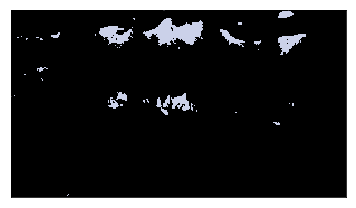

In [44]:
# plot each clusters.
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 0:
            new_image[y][x] = c1_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                       
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

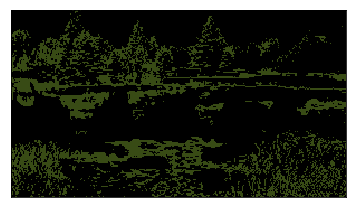

In [45]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 1:
            new_image[y][x] = c2_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                       
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

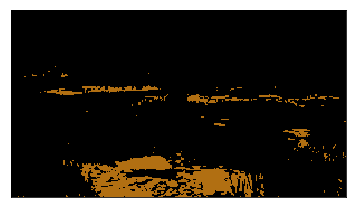

In [46]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 2:
            new_image[y][x] = c3_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                       
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

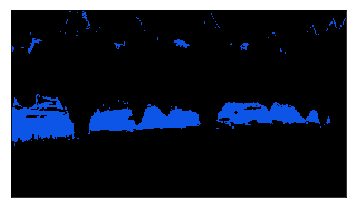

In [47]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 3:
            new_image[y][x] = c4_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                       
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

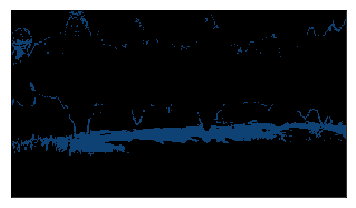

In [48]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 4:
            new_image[y][x] = c5_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                       
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

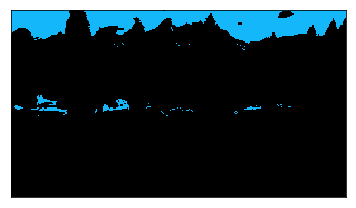

In [49]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 5:
            new_image[y][x] = c6_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                       
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

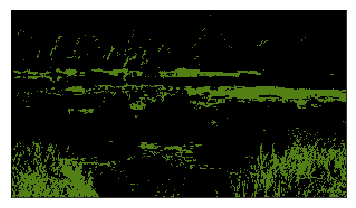

In [50]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 6:
            new_image[y][x] = c7_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                       
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

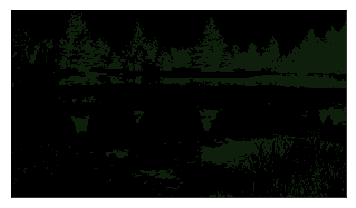

In [51]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 7:
            new_image[y][x] = c8_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                       
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

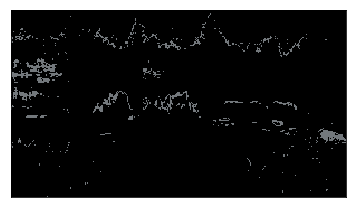

In [52]:
new_image = np.zeros((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 8:
            new_image[y][x] = c9_rgb_denorm
        else:
            new_image[y][x] = [0,0,0]
                       
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.show()

In [53]:
new_image = np.empty((height, width, 3), dtype=int)

for y in range(height):
    for x in range(width):
        
        if labelMat[y][x] == 0:
            new_image[y][x] = c1_rgb_denorm
        elif labelMat[y][x] == 1:
            new_image[y][x] = c2_rgb_denorm
        elif labelMat[y][x] == 2:
            new_image[y][x] = c3_rgb_denorm
        elif labelMat[y][x] == 3:
            new_image[y][x] = c4_rgb_denorm
        elif labelMat[y][x] == 4:
            new_image[y][x] = c5_rgb_denorm
        elif labelMat[y][x] == 5:
            new_image[y][x] = c6_rgb_denorm
        elif labelMat[y][x] == 6:
            new_image[y][x] = c7_rgb_denorm
        elif labelMat[y][x] == 7:
            new_image[y][x] = c8_rgb_denorm
        elif labelMat[y][x] == 8:
            new_image[y][x] = c9_rgb_denorm

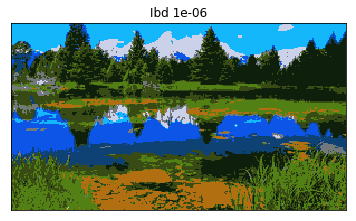

In [54]:
# Whole Image
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.title('Ibd {}'.format(lbd))
plt.show()

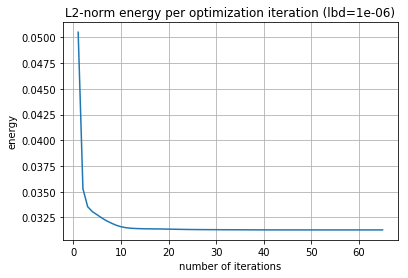

In [55]:
fig, ax = plt.subplots()
ax.plot(x_num, y_energy)
ax.set(xlabel='number of iterations', ylabel='energy',
title='L2-norm energy per optimization iteration (lbd={})'.format(lbd))
ax.grid()
plt.show()